In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import mean_absolute_error,mean_squared_error

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

# Assignment 6-7

## Reading Data

In [2]:
df = pd.read_excel("feed_the_model.xlsx")
df.sort_values(by="Day")


df_train = df.iloc[0:int(df.shape[0]*80/100),:]

df_test = df.iloc[int(df.shape[0]*80/100):df.shape[0]+1,:]

X_train = df_train[df_train.columns[df_train.columns != "total_cases"]]
y_train = df_train["total_cases"]

X_test = df_test[df_test.columns[df_test.columns != "total_cases"]]
y_test = df_test["total_cases"]

print("Data on train-set  : {}".format(X_train.shape[0]))
print("Data on test-set   : {}".format(X_test.shape[0]))

Data on train-set  : 3301
Data on test-set   : 826


## Training Models

### OLS

In [3]:
ols_model = LinearRegression(100)
ols_model.fit(X_train,y_train)

ols_model_train_predict = ols_model.predict(X_train)
ols_model_test_predict = ols_model.predict(X_test)

In [4]:
print("R-squared on train set     :",ols_model.score(X_train,y_train),"\n")

print("--- OLS model's statistics on test set ---\n")
print("R-squared                  :",ols_model.score(X_test,y_test))
print("Mean Absolute Error        :",10**mean_absolute_error(y_test,ols_model_test_predict))     
print("Mean Squared Error         :",10**mse(y_test,ols_model_test_predict))
print("Root of Mean Squared Error :",10**rmse(y_test,ols_model_test_predict))

R-squared on train set     : 0.9016083529486858 

--- OLS model's statistics on test set ---

R-squared                  : -73413136.26870495
Mean Absolute Error        : inf
Mean Squared Error         : inf
Root of Mean Squared Error : inf


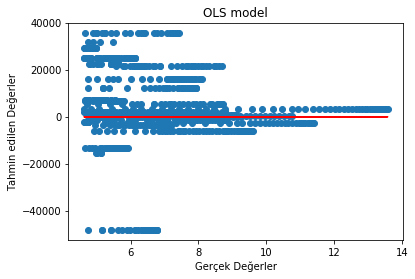

In [5]:
plt.scatter(y_test, ols_model_test_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("OLS model")
plt.show()

### Ridge Regularization

In [6]:
ridge_model = Ridge(0.1)
ridge_model.fit(X_train,y_train)

ridge_model_train_predict = ridge_model.predict(X_train)
ridge_model_test_predict = ridge_model.predict(X_test)

In [7]:
print("R-squared on train set     :",ridge_model.score(X_train,y_train),"\n")

print("--- Ridge model's statistics on test set ---\n")
print("R-squared                  :",ridge_model.score(X_test,y_test))
print("Mean Absolute Error        :",10**mean_absolute_error(y_test,ridge_model_test_predict))
print("Mean Squared Error         :",10**mean_squared_error(y_test,ridge_model_test_predict))
print("Root of Mean Squared Error :",10**mean_squared_error(y_test,ridge_model_test_predict)**(1/2))

R-squared on train set     : 0.9016071658408008 

--- Ridge model's statistics on test set ---

R-squared                  : 0.7489007652917747
Mean Absolute Error        : 4.978506571041491
Mean Squared Error         : 7.237535997021501
Root of Mean Squared Error : 8.455536397764273


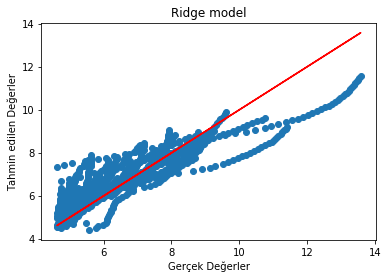

In [8]:
plt.scatter(y_test, ridge_model_test_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Ridge model")
plt.show()

### Lasso Regularization

In [9]:
lasso_model = Lasso(0.001)
lasso_model.fit(X_train,y_train)

lasso_model_train_predict = lasso_model.predict(X_train)
lasso_model_test_predict = lasso_model.predict(X_test)

In [10]:
print("R-squared on train set     :",lasso_model.score(X_train,y_train),"\n")

print("--- Lasso model's statistics on test set ---\n")
print("R-squared                  :",lasso_model.score(X_test,y_test))
print("Mean Absolute Error        :",10**mean_absolute_error(y_test,lasso_model_test_predict))
print("Mean Squared Error         :",10**mean_squared_error(y_test,lasso_model_test_predict))
print("Root of Mean Squared Error :",10**mean_squared_error(y_test,lasso_model_test_predict)**(1/2))

R-squared on train set     : 0.8983640841590813 

--- Lasso model's statistics on test set ---

R-squared                  : 0.7725858801686598
Mean Absolute Error        : 4.763411070673059
Mean Squared Error         : 6.004947652328072
Root of Mean Squared Error : 7.626612805355528


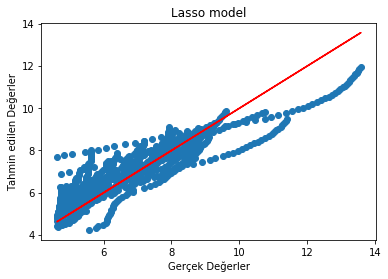

In [11]:
plt.scatter(y_test, lasso_model_test_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("Lasso model")
plt.show()

### ElasticNet

In [12]:
elasticnet_model = ElasticNet(alpha=0.0001, l1_ratio=0.9)
elasticnet_model.fit(X_train,y_train)

elasticnet_model_train_predict = elasticnet_model.predict(X_train)
elasticnet_model_test_predict = elasticnet_model.predict(X_test)

In [13]:
print("R-squared on train set     :",elasticnet_model.score(X_train,y_train),"\n")

print("--- ElasticNet model's statistics on test set ---\n")
print("R-squared                  :",elasticnet_model.score(X_test,y_test))
print("Mean Absolute Error        :",10**mean_absolute_error(y_test,elasticnet_model_test_predict))
print("Mean Squared Error         :",10**mean_squared_error(y_test,elasticnet_model_test_predict))
print("Root of Mean Squared Error :",10**mean_squared_error(y_test,elasticnet_model_test_predict)**(1/2))

R-squared on train set     : 0.9015694019104675 

--- ElasticNet model's statistics on test set ---

R-squared                  : 0.7677742273664758
Mean Absolute Error        : 4.834101081769484
Mean Squared Error         : 6.237075613175797
Root of Mean Squared Error : 7.791428244739552


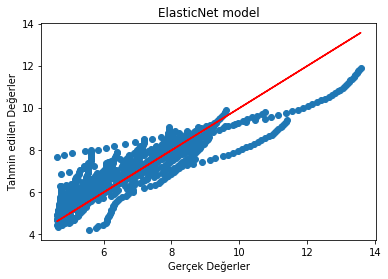

In [14]:
plt.scatter(y_test, elasticnet_model_test_predict)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin edilen Değerler")
plt.title("ElasticNet model")
plt.show()

## Conclusion

In [15]:
conc = pd.DataFrame()

conc["OLS"] = [ols_model.score(X_train,y_train),ols_model.score(X_test,y_test)]
conc["Ridge"] = [ridge_model.score(X_train,y_train),ridge_model.score(X_test,y_test)]
conc["Lasso"] = [lasso_model.score(X_train,y_train),lasso_model.score(X_test,y_test)]
conc["ElasticNet"] = [elasticnet_model.score(X_train,y_train),elasticnet_model.score(X_test,y_test)]

conc.index = ["Train set R-squared","Test set R-squared"]

conc

,OLS,Ridge,Lasso,ElasticNet
Train set R-squared,0.902,0.902,0.898,0.902
Test set R-squared,-73413136.269,0.749,0.773,0.768


Even though OLS has the best performance on training set, the ridge model has the best performance on test set. This means our OLS model may have over-fitting problem and we overcome that problem by algorithms that have regularization.

## Testing

In [20]:
lasso_model.coef_.shape

(149,)

In [37]:
Turkey = X_test[X_test["Turkey"] == 1]
Turkey = Turkey.iloc[0]

Turkey["Day"] = 39

In [40]:
sum(Turkey * lasso_model.coef_)

12.489445293851361